In [1]:
from diffusers.utils import load_image, make_image_grid
from PIL import Image
import cv2
import numpy as np

original_image = load_image(
    "./dataset/structure_with_cracks0.png"
)

image = np.array(original_image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)

C:\Users\dan_d\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16, use_safetensors=True)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, use_safetensors=True
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")
pipe.enable_model_cpu_offload()

Loading pipeline components...: 100%|██████████| 7/7 [00:09<00:00,  1.33s/it]


100%|██████████| 50/50 [02:56<00:00,  3.52s/it]


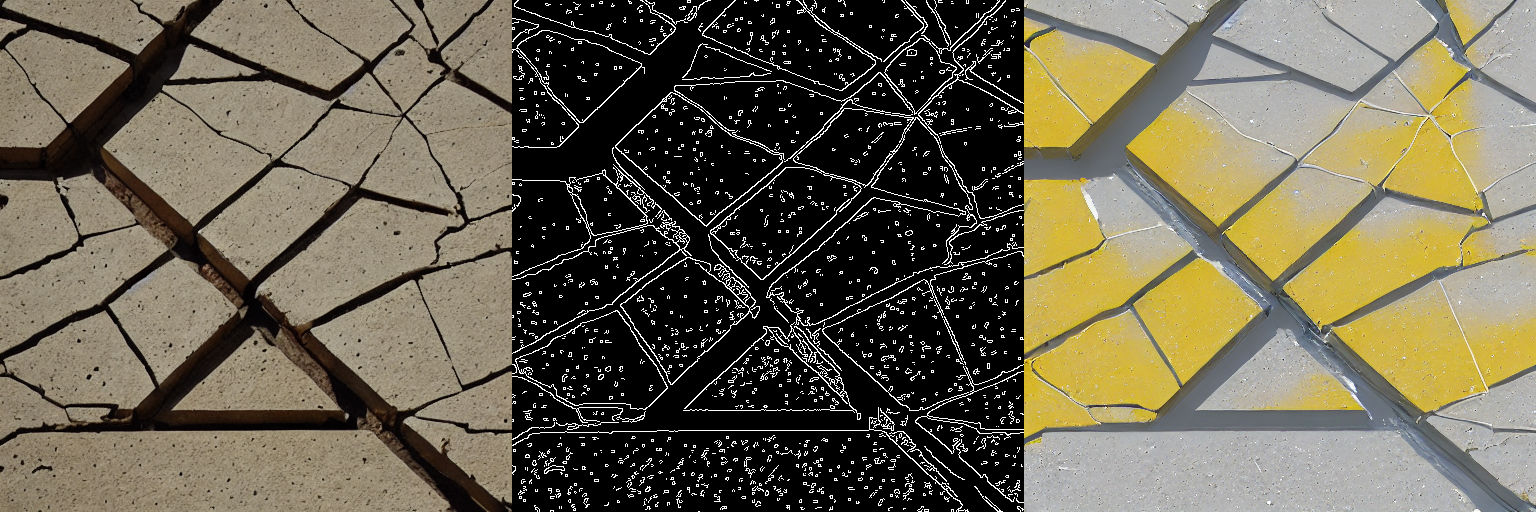

In [11]:
output = pipe(
    "Semantic Segmentation Mask of damage to structure. Cracks are masked with yellow", image=canny_image
).images[0]
make_image_grid([original_image, canny_image, output], rows=1, cols=3)

In [12]:
output.save("Semantic_mask_attempt.jpg")

In [13]:
canny_image.save("canny_mask_attempt.jpg")

In [ ]:
output = pipe(
    "Concrete with cracks", image=canny_image
).images[0]
make_image_grid([original_image, canny_image, output], rows=1, cols=3)

In [ ]:
output.save("controlnet_further_generation_same_mask.jpg")
canny_image.save("canny_mask_further_generation.jpg")